In [545]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from   sklearn.metrics  import *
from   sklearn.base     import ClassifierMixin,TransformerMixin
from   sklearn.datasets import load_iris,make_classification
from   sklearn.model_selection import train_test_split
from   sklearn.preprocessing import StandardScaler

In [546]:
# função de decisão
def omega(Z):
    return np.where(Z>=0,1,0)

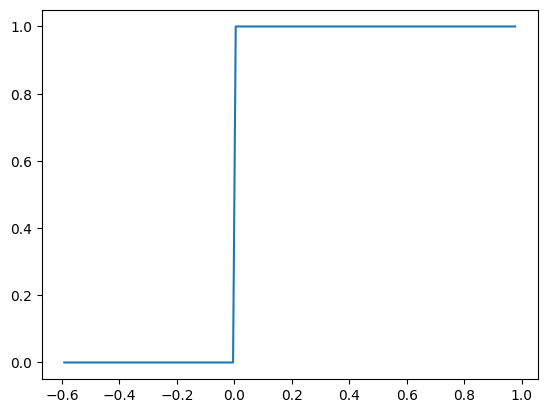

In [547]:
Z = np.random.uniform(-0.6,1,size=(100,1))
plt.plot(np.sort(Z,axis=0),omega(np.sort(Z,axis=0)))
plt.show()

In [548]:
class AlgorithmPerceptron(ClassifierMixin):
    # Taxa de aprendizagem (eta) varia de 0 e 1
    # Número de iteraçoes
    # RandomState : os peso são iniciados aleatoriamente

    w_ = None # Peso das caracteristicas
    b_ = None # Vies 
    m_ = None # Número de instancias das caracteristica
    def __init__(self, eta = 0.001, max_iter = 1_000, random_state = 1):
        self.eta          = eta
        self.max_iter     = max_iter
        self.random_state = random_state
    
    def ErrorsAll(self):
        for iter,value in enumerate(self.erros):
            print(f'Iter {iter}) teve pesos atualizado {value}')

    def fit(self, X:np.array, y:np.array):
        rgen = np.random.RandomState(self.random_state)

        # Inicializando os peso e vies aleatoriamente | ou não
        self.m_ = np.size(X,axis=1)
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size=self.m_)
        self.b_ = np.float64(0.)

        self.erros = []
        for _ in range(self.max_iter):
            errors = 0

            for xi, yi in zip(X,y):
                update = self.eta * (yi - self.predict(xi))    
                self.w_ += update * xi    
                self.b_ += update               
                errors += int(update != 0)
            
            self.erros.append(errors)

        return self
    
    def FuncaoDegrau(self, X):
        return np.where( self.SomaPonderada(X)>=0 , 1, 0)
    
    def SomaPonderada(self, X):
        return np.dot(X,self.w_) + self.b_
    
    def predict(self, X):
        return self.FuncaoDegrau(X)

#### $update$
me ira retorna uma valor igual a 0 ou diferente de 0
* Se for igual a $0$ a predição foi correta
* Se não foi incorreta
    * Com isso atualiza os pesos e vies  
    
**Ex:** 

1. **Iter** :
    * $peso =[0,0]$ || $vies = 0$ || $x¹ = [0 ,1]$
    * update = $\eta \cdot( y^{1} - (predict(x^1)))$ = $0.1 \cdot(1-1) = 0$
        * update = 0 , não atualiza os pesos não a erros
        * peso = peso + 0 * ($x^1$) 
        * vies = vies + 0

2. **Iter** : update = $\eta \cdot( y^{1} - (predict(x^1)))$ = $0.1 \cdot(1-1) = 0$
    *  $peso =[0,0]$ || $vies = 0$ || $x¹ = [2 ,1]$
    * update = $\eta \cdot( y^{2} - (predict(x^2)))$ = $0.1 \cdot(1-0) = 0.1$
        * update = 0.1 , atualiza os pesos e vies
        * peso += 0.1 * ($x^2$) = 0.1 * [2,1] = [0.2,0.1]
        * vies += update = 0.1
> continua assim até terminar o número de epocas

### Carregando dataset

In [549]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,encoding='utf-8')

X = data.iloc[:,[1,2]].values
y = data.iloc[:,4]
y = np.where(y=='Iris-setosa',0,1)

In [550]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=100, random_state=0)

Perceptron : treinando

In [551]:
perceptron = AlgorithmPerceptron(max_iter=150,eta=0.01)
perceptron.fit(xtrain,ytrain)

In [552]:
predP = perceptron.predict(xtest)

In [553]:
print(classification_report(ytest,predP))
print(accuracy_score(ytest,predP))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

1.0


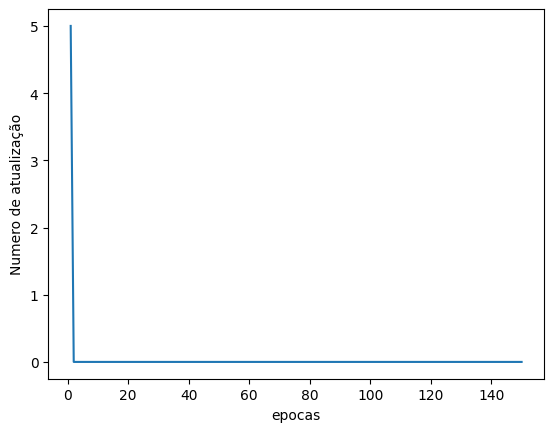

In [554]:
plt.plot(range(1,len(perceptron.erros)+1),perceptron.erros)
plt.ylabel('Numero de atualização')
plt.xlabel('epocas')
plt.show()

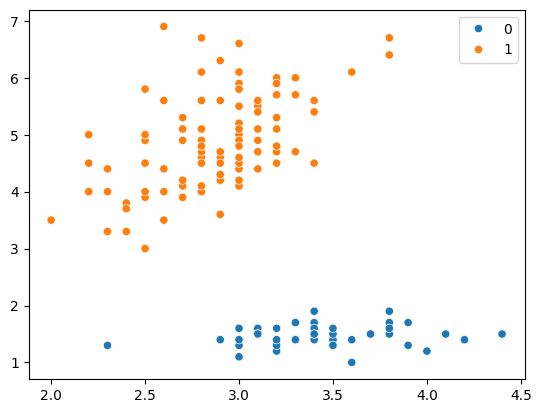

In [555]:
sea.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.show()

In [556]:
from matplotlib.colors import ListedColormap
def plotDecisionRegion(X,y,classifier,resolution=0.02):
    marks = ('o','s','^','v','<')
    color = ('red','blue','lightgreen','gray','cyan')

    cmap  = ListedColormap(colors=color[:len(np.unique(y))])

    x1Min, x1Max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2Min, x2Max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1Min,x1Max,resolution),
        np.arange(x2Min,x2Max,resolution)
    ) 
    x = np.array([xx1.ravel(),xx2.ravel()])
    lab = classifier.predict(x.T)

    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[ y == cl,0 ],y=X[ y == cl,1 ] , alpha=0.8,c=color[idx],marker=marks[idx],edgecolors='black')
    
    plt.legend(np.unique(y))
    plt.show()

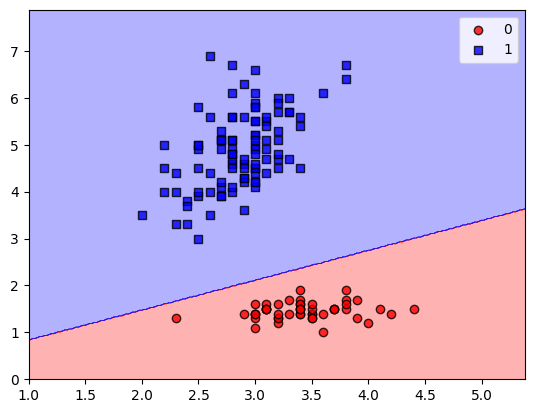

In [557]:
plotDecisionRegion(X,y,perceptron)

### AdalineSDB
* Ele utiliza todos o conj de treinamento para atualizar os pesos e vies do modelo ( gradiente descente em batch)

In [569]:
class AdalineGD(ClassifierMixin):
    """AdalineGD"""
    w_ = None # Peso
    b_ = None # Vies 
    m_ = None # Número de caracteristicas

    def __init__(self, eta = 0.01, max_iter = 1_000, randomState = 1, tol=1e-4):
        self.eta         = eta
        self.max_iter    = max_iter
        self.randomState = randomState
        self.tol         = tol
    
    def fit(self, X, y):
        
        rgen = np.random.RandomState(self.randomState)

        self.m_ = np.size(X,axis=1)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=self.m_)
        self.b_ = np.float64(0.0)

        self.losses_ = [] # perdas

        for iter in range(self.max_iter):
            somaPonderada = self.SomaPoderada(X)
            saida = self.activacaoLinear(somaPonderada)

            erros = y - saida
            self.w_ += self.eta * 2.0 * X.T.dot(erros) / np.size(X, axis=0)
            self.b_ += self.eta * 2.0 * erros.mean()

            loss = np.mean( erros**2 )

            self.losses_.append(loss)

            if iter >= 2:
                if abs( self.losses_[len(self.losses_)-1] - self.losses_[len(self.losses_)-2] ) <= self.tol:break
        
        return self

    def activacaoLinear(self, X):
        return X
    
    def SomaPoderada(self, X):
        return np.dot(X,self.w_) + self.b_
    
    def predict(self, X):
        return np.where( self.activacaoLinear(self.SomaPoderada(X))>=0.5 ,1 ,0)

In [570]:
ada = AdalineGD(max_iter=100,eta=0.001,tol=1e-10)
ada.fit(xtrain,ytrain)

In [560]:
predAda = ada.predict(xtest) 

In [561]:
print(classification_report(ytest,predAda))
print(accuracy_score(ytest,predAda))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

1.0


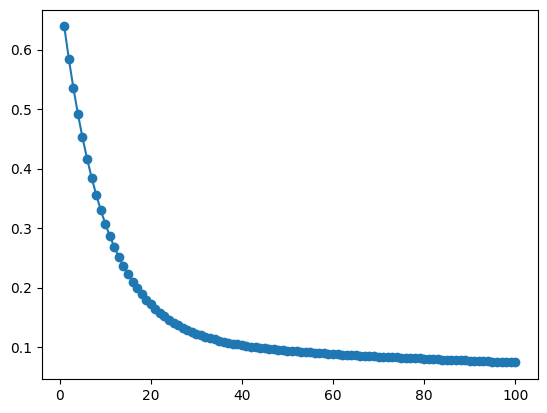

In [562]:
plt.plot(range(1,len(ada.losses_)+1),ada.losses_,marker='o')
plt.show()

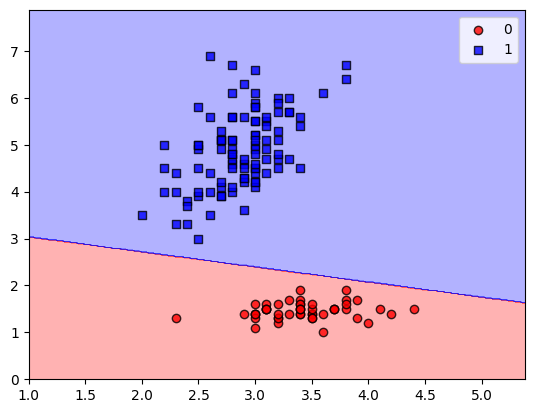

In [563]:
plotDecisionRegion(X,y,ada)

### OBS
Importante deixar as caracteristicas nua mesma escala para que convirja mais rapido

##### padronização
$$
\frac{x_i - \mu_i}{\sigma_i}
$$

In [564]:
class Padronizacao(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        newX = []
        
        for i in range( np.size(X, axis=1) ):
            stand = []
            media = np.mean(X[:,i])
            std   = np.std(X[:,i])
            for j,xi in enumerate(X):
                stand.append( (xi - media)/std )
                
            newX.append(stand)

        return np.array(newX)[0]

In [565]:
xtrain = Padronizacao().fit_transform(xtrain)
xtest  = Padronizacao().fit_transform(xtest)

In [566]:
ada = AdalineGD(max_iter=1000,eta=0.01,tol=1e-5)
ada.fit(xtrain,ytrain)
predAda = ada.predict(xtest)

In [567]:
print(classification_report(ytest,predAda))
print(accuracy_score(ytest,predAda))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

1.0


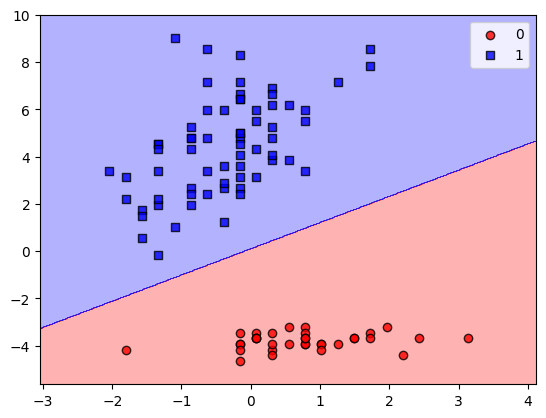

In [568]:
plotDecisionRegion(xtrain,ytrain,ada)